## 4/16 範例程式

### 讀取資料

In [1]:
import pandas as pd 
df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

df_blue_New = df[df['Page_Name']=='中國國民黨 KMT'][['Message','Post_Date']] #只要國民黨的文章和時間
df_blue_New = df_blue_New.dropna()

### 結巴斷詞 jieba
+ len(df_blue_New)：看國民黨的貼文總共有幾筆，單獨把doc_names印出來發現有482篇
+ 原本df_blue_New['Message']型態是pandas.core.series.Series，需要先轉成list的形式才可以加進去。
+ 接下來我們創造一個新的dataframe叫做df_blue_docs，型態是pandas.core.frame.DataFrame
+ 原本df_blue_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [2]:
doc_names = range(len(df_blue_New)) #有幾篇文章
text_list = list(df_blue_New['Message']) #把要斷的東西轉list

#創造空的dataframe叫做df_blue_docs
df_blue_docs = pd.DataFrame(columns=['jieba_results'])

df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

+ 第一個迴圈</br>
剛才我們知道，國民黨的篇數有482篇：
我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到482(第482篇)；</br>
而text_list就是我們剛剛轉成list型態的國民黨貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

+ 第二個迴圈</br>
words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br>
word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

+ append加回斷詞欄位</br>
之後把text內容存到'jieba_results'這個欄位裡面，再和df_blue_docs合併。</br>
最後我們df_blue_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [3]:
import jieba
from tqdm import tqdm

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    
    s = pd.Series({'jieba_results': text})
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)#每次的斷詞結果都加回df_blue_docs

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\COCO\AppData\Local\Temp\jieba.cache
Loading model cost 1.142 seconds.
Prefix dict has been built succesfully.


+ 注意
在最後生成的df_blue_docs，因為是ignore_index=True有重置過index</br>
所以在和df_blue_New合併之前，需要先重置df_blue_New的index</br>
> 可以參考：https://ithelp.ithome.com.tw/m/articles/10200052

In [4]:
df_blue_New.reset_index(inplace=True)

我們把最後得到的df_blue_docs，加到df_blue_New裡面

In [5]:
df_blue_New['jieba_results'] = df_blue_docs
df_blue_New_select = df_blue_New[['jieba_results','Post_Date']]
df_blue_New.head(2)

#可以查看個別貼文的斷詞情況
#df_blue_New['jieba_results'][477]

,index,Message,Post_Date,jieba_results
0,31,今日挺韓「南方崛起高雄光榮周年慶大遊行」 下午1點11分準時出發\n全程我們都是秉持著理性且...,2019-12-21,今日 挺韓 「 南方 崛起 高雄 光榮 周年 慶大遊行 」 下午 1 點 11 分準 ...
1,100,【元旦升旗，不見不散】\n\n你有多久沒有唱國歌、升國旗了？迎接明年元旦，我們一起升旗吧！國...,2019-12-29,【 元旦 升旗 ， 不見 不散 】 \n \n 你 有 多久 沒有 唱國歌 、 升國旗 了...


### 分析 民主進步黨 與 台灣民眾黨  

> #### 1. 資料前處理 
> #### 2. TF-IDF
> #### 3. PCA    
> #### 4. 關聯圖

### 資料前處理
選出民進黨的發文，處理方式和上面一樣

In [6]:
df_green = df[df['Page_Name']=='民主進步黨']
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

#停用字和自訂字典
jieba.load_userdict("dict/user.txt")
stopwords = [line.strip() for line in open('dict/stop_words.txt', 'r', encoding='utf-8').readlines()]  

for i in doc_names:
    
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        if word not in stopwords: 
            text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'

df_green_New

,index,Post_Date,Message,jieba_results,df_class
0,3,2020-01-11,《2020 台灣要贏 LET'S WIN 開票之夜》,2020 台灣 要贏 LET S WIN 開票 之夜,green
1,10,2020-01-10,總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...,總統票 號 蔡英文 賴清德 立委 票 請 支持 民主 進步 黨 提名 推薦 候選人 第三 ...,green
2,11,2020-01-07,#這是我的投票意志\n\n總統票3號、政黨票14號，\n3.14是圓周率，守護民主需要投票率...,這是 投票 意志 \n \n 總統票 號 政黨票 14 號 \n 3.14 圓周率 守護 ...,green
3,14,2020-01-10,🔥蔡英文賴清德 #光復高雄 選前之夜🔥\n\n2020 高雄大贏！2020 台灣要贏！\n高...,🔥 蔡英文 賴清德 光 復 高雄 選前 之夜 🔥 \n \n 2020 高雄大...,green
4,19,2020-01-05,1月11日，我們一起回家投票！\n\n這一天的你，早起搭上返鄉的列車，檢查身份證是否帶上，我...,月 11 日 一起 回家 投票 \n \n 一天 早起 搭上 返鄉 列車 檢查 身份 證 ...,green
...,...,...,...,...,...
850,3770,2019-12-15,【護國會 保台灣】中央助講團–彰化場\n守住國會保平安 集中選票挺台灣,護國會 保台灣 中央 助講團 – 彰化 場 \n 守住 國會 保平安 集中 選...,green
851,3775,2019-07-14,#你知道戒嚴是什麼嗎\n#你知道台灣戒嚴多久嗎\n#你知道戒嚴時禁止哪些行為嗎\n\n明天7...,知道 戒嚴 \n 知道 台灣 戒嚴 多久 \n 知道 戒 嚴時 禁止 行為 \n \n 明...,green
852,3779,2019-10-29,｜小民怎麼了？邀請你看懶人包幫助更多人｜\n\n人吃五穀雜糧，難免有年紀漸長的一天\n即使不...,｜ 小民 邀請 懶人 包幫助 更 ｜ \n \n 吃 五 穀 雜糧 難免 年 紀漸 長 一...,green
853,3784,2019-12-15,【護國會 保台灣】中央助講團–彰化場,護國會 保台灣 中央 助講團 – 彰化 場,green


#改變日期
df_green_New['Post_Date'] = df_green_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test1 = df_green_New.groupby(df_green_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})

#取出日期
date = sorted(df_green_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test1):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d_green = {"Post_Date": date,"jieba_results": store,"df_class":'green'}
df_green_New = pd.DataFrame(d_green)
df_green_New

選出台灣民眾黨的發文，處理方式和上面一樣

In [7]:
df_white = df[df['Page_Name']=='台灣基進']

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

#停用字和自訂字典
jieba.load_userdict("dict/user.txt")
stopwords = [line.strip() for line in open('dict/stop_words.txt', 'r', encoding='utf-8').readlines()]  

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New.reset_index(inplace=True)        
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'

df_white_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-11,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
1,1,2020-01-10,謝謝吳念真支持陳柏惟❤️！,謝謝 吳念 真 支持 陳 柏惟 ❤ ️ ！,white
2,2,2020-01-12,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,【 3Q 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 ...,white
3,4,2020-01-08,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,從 台灣 基進 創立 以來 ， 高雄 一直 是 我們 最溫 暖 的 家 鄉 。 \n ...,white
4,6,2020-01-12,首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...,首先 ， 感謝 每 一張 堅定 投給 台灣 基進 的 政黨票 。 \n \n 感謝 每 一...,white


#改變日期
df_white_New['Post_Date'] = df_white_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test2 = df_white_New.groupby(df_white_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})

#取出日期
date = sorted(df_white_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test2):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d_white = {"Post_Date": date,"jieba_results": store,"df_class":'white'}
df_white_New = pd.DataFrame(d_white)
df_white_New

合併上面兩個dataframe

In [8]:
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
mergeData

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-11,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
1,1,2020-01-10,謝謝吳念真支持陳柏惟❤️！,謝謝 吳念 真 支持 陳 柏惟 ❤ ️ ！,white
2,2,2020-01-12,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,【 3Q 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 ...,white
3,4,2020-01-08,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,從 台灣 基進 創立 以來 ， 高雄 一直 是 我們 最溫 暖 的 家 鄉 。 \n ...,white
4,6,2020-01-12,首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...,首先 ， 感謝 每 一張 堅定 投給 台灣 基進 的 政黨票 。 \n \n 感謝 每 一...,white
...,...,...,...,...,...
850,3770,2019-12-15,【護國會 保台灣】中央助講團–彰化場\n守住國會保平安 集中選票挺台灣,護國會 保台灣 中央 助講團 – 彰化 場 \n 守住 國會 保平安 集中 選...,green
851,3775,2019-07-14,#你知道戒嚴是什麼嗎\n#你知道台灣戒嚴多久嗎\n#你知道戒嚴時禁止哪些行為嗎\n\n明天7...,知道 戒嚴 \n 知道 台灣 戒嚴 多久 \n 知道 戒 嚴時 禁止 行為 \n \n 明...,green
852,3779,2019-10-29,｜小民怎麼了？邀請你看懶人包幫助更多人｜\n\n人吃五穀雜糧，難免有年紀漸長的一天\n即使不...,｜ 小民 邀請 懶人 包幫助 更 ｜ \n \n 吃 五 穀 雜糧 難免 年 紀漸 長 一...,green
853,3784,2019-12-15,【護國會 保台灣】中央助講團–彰化場,護國會 保台灣 中央 助講團 – 彰化 場,green


## TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。
+ CountVectorizer算字頻（搭配fit_transform）
+ TfidfTransformer計算TFIDF
>　可以參考文章：https://ithelp.ithome.com.tw/articles/10228481?sc=iThelpR

In [9]:
corpus = mergeData['jieba_results'].values.tolist()

In [10]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

把文章的日期當作是待會畫PCA的特徵，一個點就會代表同一天的文

In [11]:
len(corpus)
features = tfidf.toarray() #轉矩陣
labels = mergeData['Post_Date'].values #Post_Date
labels

array(['2020-01-11T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', ...,
       '2019-10-29T00:00:00.000000000', '2019-12-15T00:00:00.000000000',
       '2019-11-05T00:00:00.000000000'], dtype='datetime64[ns]')

### PCA

In [12]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head()
print(features)
print(transData)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.1239951   0.02136261]
 [-0.03302521  0.00878719]
 [ 0.15159653 -0.06276692]
 ...
 [-0.03537834  0.00712317]
 [-0.11586765 -0.0351735 ]
 [-0.0642613  -0.02650045]]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(kind = 'scatter',data=mergeData,hue="df_class", diag_kind="kde",height=2.5)

In [14]:
textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,000,0000,0005,01,010,0103,0105,0110,0127,...,龍門,龐克,龐克音樂,龐大,龐大市場,龐大資產,龐大軍餉,龔青,龜山,龜笑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [16]:
allF[np.nonzero(allF)]

array([0.05473645, 0.08943418, 0.08200129, ..., 0.13632113, 0.14000416,
       0.14451182])

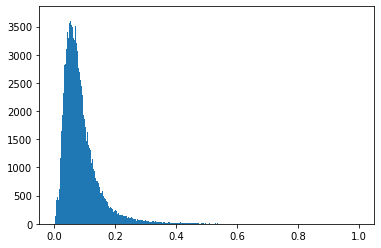

0.07255868078793623

In [17]:
plt.hist(nonZero, bins=500)
plt.show()
m

## k-means分群方法

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
tfidf = TfidfVectorizer( # TfidfVectorizer or CountVectorizer
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_green_New['jieba_results'])
text = tfidf.transform(df_green_New['jieba_results'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


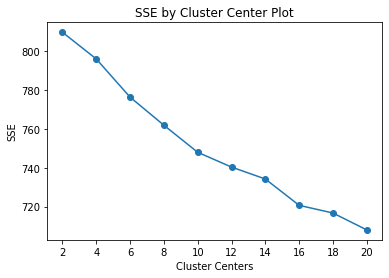

In [20]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

#### 設定kmeans要分幾群
因為是使用抽樣的方式，MiniBatchKMeans 和一般的kmeans相比速度較快
下面介紹他的參數有哪些，一般來說決定分幾群就可以，不太需要調參數：
+ n_clusters：要分幾群 
+ init_size：質心初始值候選的樣本個數，預設是batch_size的3倍，一般用預設值就可以了
+ batch_size：用來跑Mini Batch KMeans演算法的取樣集的大小，預設是100
  如果發現數據集的類別較多或者噪音點較多，需要增加這個值以達到較好的聚類效果

In [21]:
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

下面這邊會把用pca還有tsne兩種方式壓縮的散佈圖都畫出來，</br>
如果覺得分群的方式沒問題，就可以把每群的代表字抓出來。

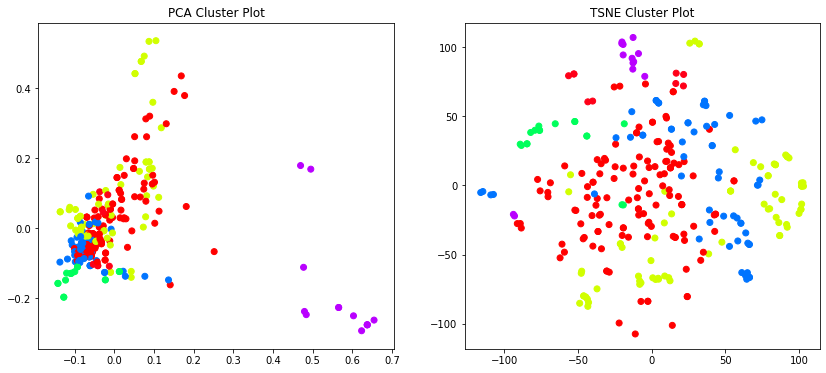

In [22]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000) #replace=False
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300) #replace=False
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    labels
    
plot_tsne_pca(text, clusters)

下面會把每一群tfidf較大的字印出來，在第八行的get_top_keywords可以決定要印幾個字，這裡先印20個。

In [23]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)


Cluster 0
國民黨,候選人,護國會,保台灣,青年,保台,民進,wen,tsai,要贏,政黨票,ing,立委,蔡英文,總統,進步,一起,2020,民主,台灣

Cluster 1
新北,地點,2020,選區,郭國文,總統,賴清德,直播,投票,候選人,台南,振彥,台灣,卓榮泰,三重,一起,彰化,支持,立委,余天

Cluster 2
條例,不要,秘書長,政府,中共,民主自由,北京,暴力,和平,港人,自由,民主,人民,兩制,港府,中國,反送,一國,台灣,香港

Cluster 3
林飛帆,本黨,進行,執會,召開,主持,新聞稿,中常,初選,進步,卓榮泰,轉述,民進,李晏榕,秘書長,台灣,發言人,主席,記者,民主

Cluster 4
參加,連任,杭州,北路,2019,號至,12,00,總部前,入場,18,保台,29,護國,1229,之夜,東路,北平,下架,吳斯懷

Cluster 5
帶來,觀賞,多元,朋友,一位,認同,本週,活動,部誠摯,表演,婦女,台灣,胖卡,民進,阿力,越南,11,市集,文化,住民
